In [1]:
import pandas as pd

### Loading the DataSet

In [2]:
df = pd.read_csv(r"OneDrive/Desktop/sadia -code/synthetic_parkinsons_dataset.csv")
df

,age,heart rate,spo2,muscle stiffness,calories burnt,average sleep,daily step count,parkinsons
0,61,78,97,7.67,1880,5.64,7244,1
1,66,55,97,4.30,2116,6.78,7069,1
2,78,79,90,2.79,1822,5.36,3293,1
3,82,82,96,3.59,1770,5.53,4434,1
4,52,67,97,4.35,1602,5.21,7302,1
...,...,...,...,...,...,...,...,...
495,65,79,99,8.08,2359,7.94,5516,1
496,55,68,92,7.15,2279,7.71,7741,1
497,43,75,95,2.04,1737,7.68,8401,0
498,52,62,95,3.95,2788,6.55,9642,0


In [3]:
df.head()


,age,heart rate,spo2,muscle stiffness,calories burnt,average sleep,daily step count,parkinsons
0,61,78,97,7.67,1880,5.64,7244,1
1,66,55,97,4.30,2116,6.78,7069,1
2,78,79,90,2.79,1822,5.36,3293,1
3,82,82,96,3.59,1770,5.53,4434,1
4,52,67,97,4.35,1602,5.21,7302,1


In [4]:
df.tail()

,age,heart rate,spo2,muscle stiffness,calories burnt,average sleep,daily step count,parkinsons
495,65,79,99,8.08,2359,7.94,5516,1
496,55,68,92,7.15,2279,7.71,7741,1
497,43,75,95,2.04,1737,7.68,8401,0
498,52,62,95,3.95,2788,6.55,9642,0
499,52,71,97,2.99,2648,8.64,8885,0


In [5]:
df.info

<bound method DataFrame.info of      age  heart rate  spo2  muscle stiffness  calories burnt  average sleep  \
0     61          78    97              7.67            1880           5.64   
1     66          55    97              4.30            2116           6.78   
2     78          79    90              2.79            1822           5.36   
3     82          82    96              3.59            1770           5.53   
4     52          67    97              4.35            1602           5.21   
..   ...         ...   ...               ...             ...            ...   
495   65          79    99              8.08            2359           7.94   
496   55          68    92              7.15            2279           7.71   
497   43          75    95              2.04            1737           7.68   
498   52          62    95              3.95            2788           6.55   
499   52          71    97              2.99            2648           8.64   

     daily step cou

In [7]:
df.describe()

,age,heart rate,spo2,muscle stiffness,calories burnt,average sleep,daily step count,parkinsons
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,61.562000,71.866000,95.438000,4.55468,2031.648000,6.462820,7507.050000,0.500000
std,11.660106,7.388723,1.927066,1.94684,367.354017,1.151541,3036.048079,0.500501
min,40.000000,53.000000,90.000000,0.22000,994.000000,2.680000,1003.000000,0.000000
25%,52.000000,67.000000,94.000000,3.00500,1759.000000,5.637500,4836.500000,0.000000
50%,61.000000,71.000000,96.000000,4.32500,2025.500000,6.475000,7252.500000,0.500000
75%,69.000000,76.000000,97.000000,6.10500,2263.500000,7.222500,10085.000000,1.000000
max,85.000000,96.000000,100.000000,9.21000,3150.000000,9.550000,15399.000000,1.000000


In [9]:
df.isnull().sum()

age                 0
heart rate          0
spo2                0
muscle stiffness    0
calories burnt      0
average sleep       0
daily step count    0
parkinsons          0
dtype: int64

### Outlier Analysis and Treatment
Examine each numeric feature for outliers. Using visualizations like box plots helps identify extreme values. You can choose to cap outliers (for example, at the 1st and 99th percentiles) to reduce their impact on scaling and model training.

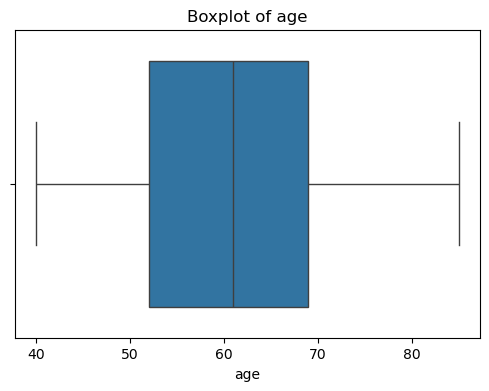

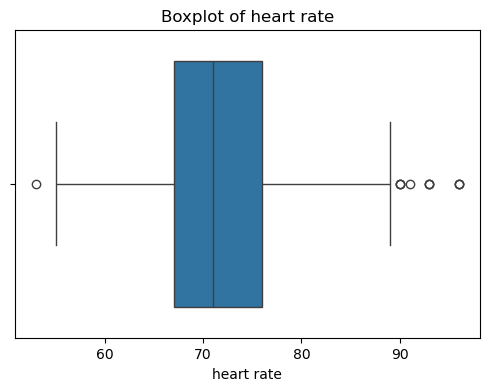

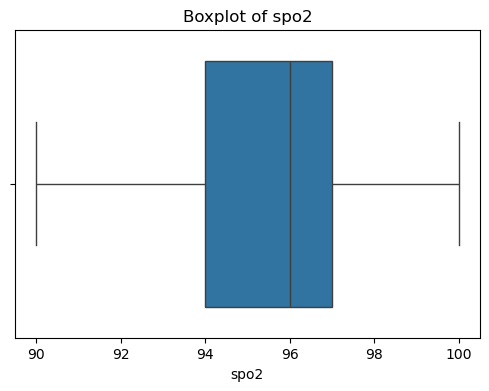

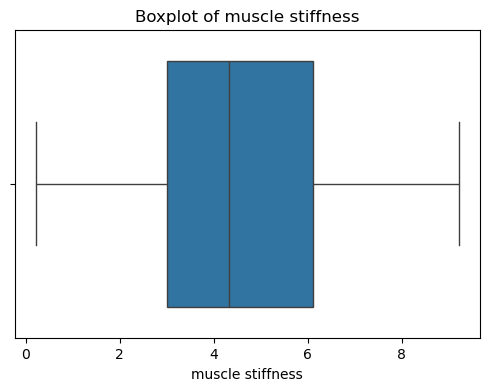

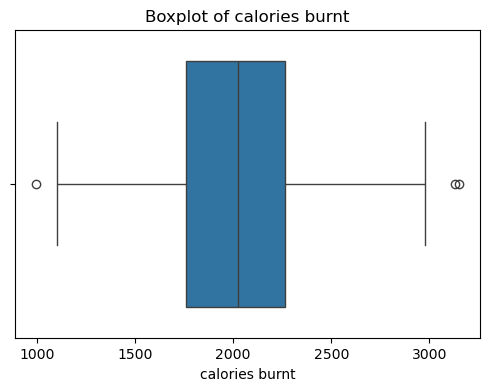

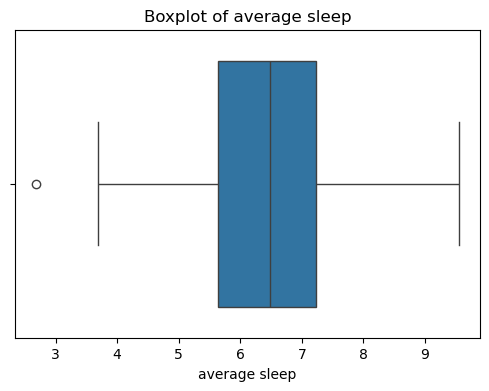

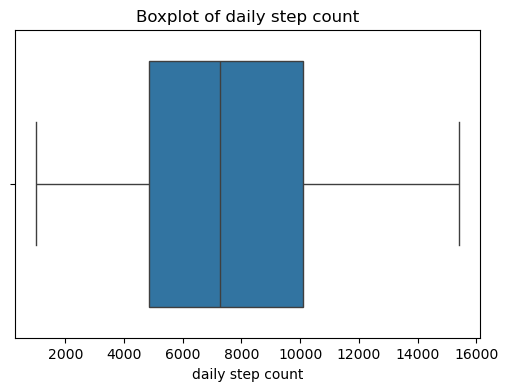

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# List numeric columns excluding the target 'parkinsons'
numeric_cols = df.columns.drop("parkinsons")

# Plot boxplots for each numeric feature to visualize outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Optionally, cap the outliers by clipping at the 1st and 99th percentiles:
def cap_outliers(series):
    lower_bound = series.quantile(0.01)
    upper_bound = series.quantile(0.99)
    return series.clip(lower_bound, upper_bound)

df[numeric_cols] = df[numeric_cols].apply(cap_outliers)


### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
features = df.drop("parkinsons", axis=1)
target = df["parkinsons"]

# Scale features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled data back into a DataFrame for easier handling
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)


### Splitting the Dataset
Divide the dataset into training and testing subsets. A typical split is 80% training and 20% testing. It’s a good idea to use stratified splits for classification tasks, ensuring that the class balance in both subsets mirrors the overall dataset.

In [12]:
from sklearn.model_selection import train_test_split

# Stratified train-test split to preserve the distribution of the target class
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features_df, target,
    test_size=0.2,
    random_state=42,
    stratify=target
)

# Verify the distribution in train and test sets
print("Train set target distribution:")
print(y_train.value_counts(normalize=True))
print("Test set target distribution:")
print(y_test.value_counts(normalize=True))


Train set target distribution:
parkinsons
1    0.5
0    0.5
Name: proportion, dtype: float64
Test set target distribution:
parkinsons
1    0.5
0    0.5
Name: proportion, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set up a nice plotting style
sns.set(style="whitegrid", palette="muted", color_codes=True)

### Univariate Analysis

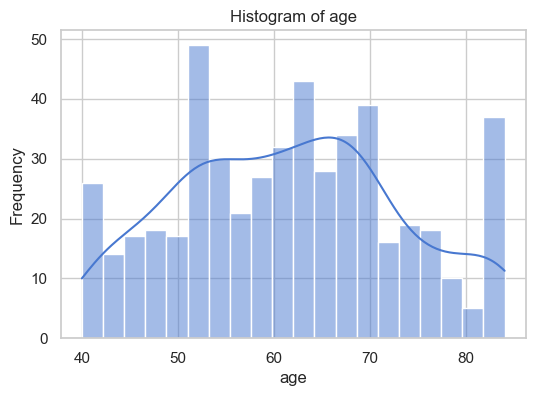

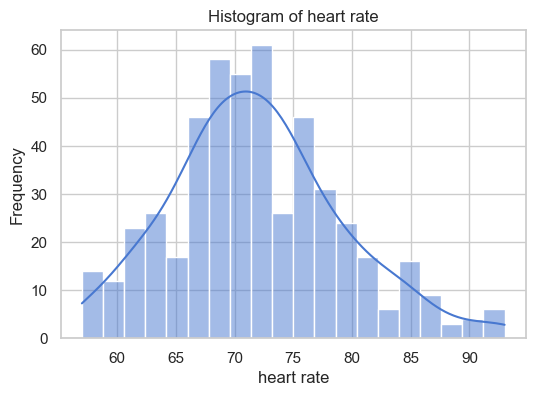

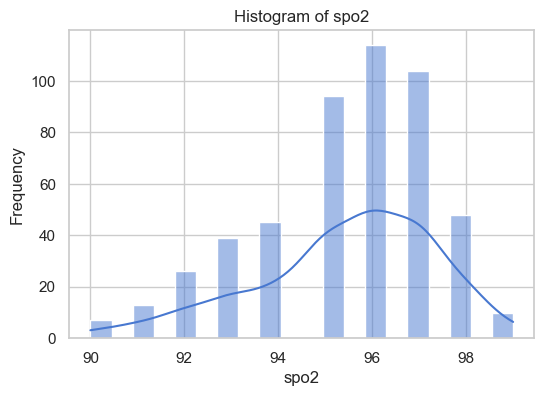

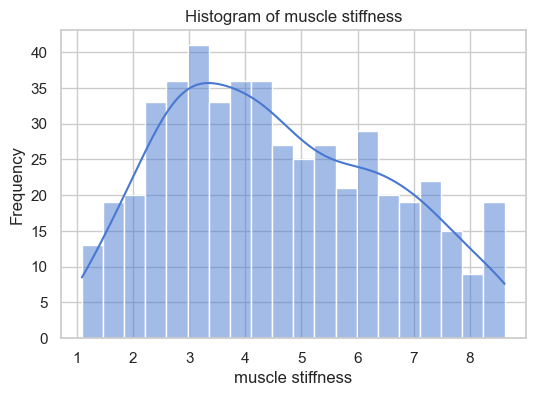

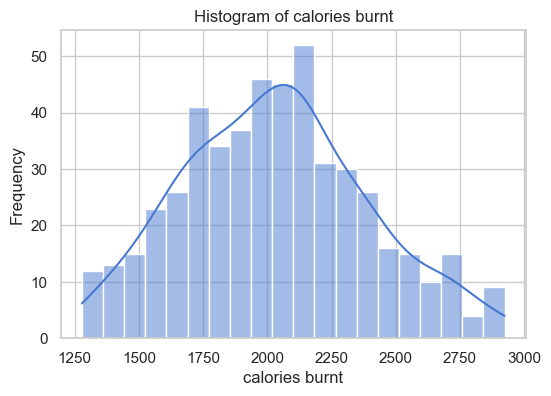

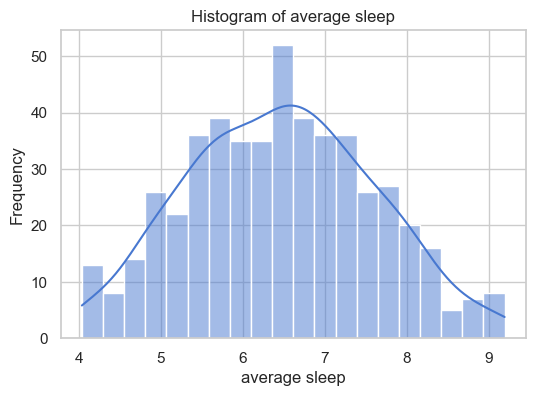

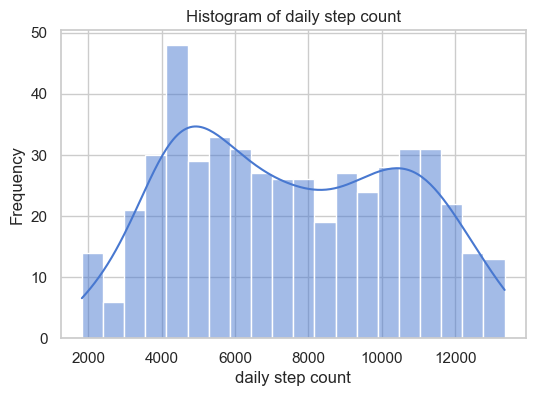

In [14]:
# List of columns excluding the target
numeric_cols = df.columns.drop("parkinsons")

# Create histograms for each feature
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


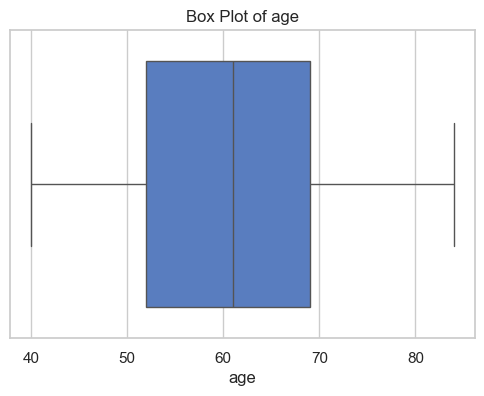

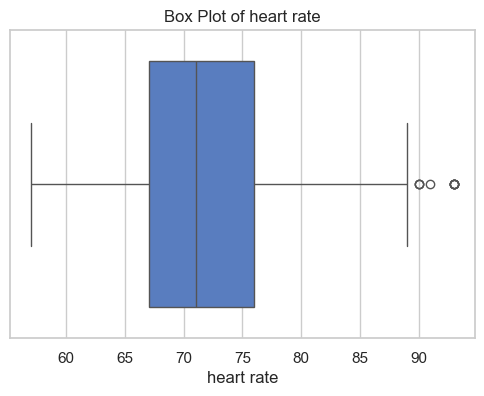

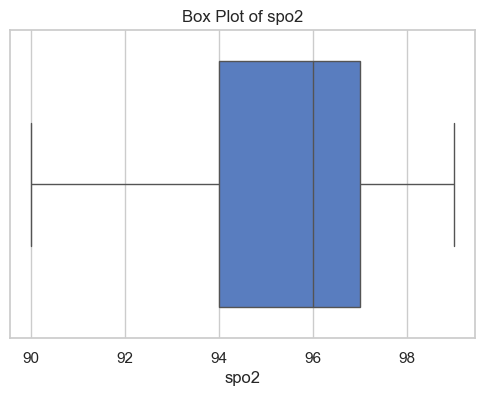

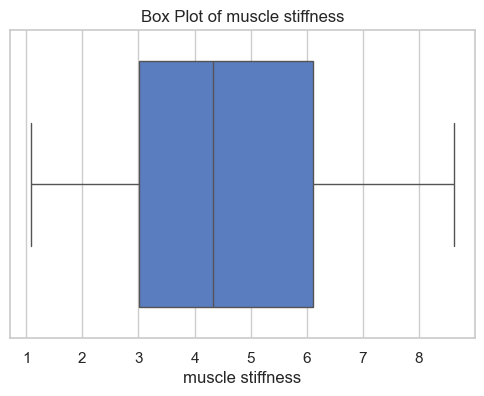

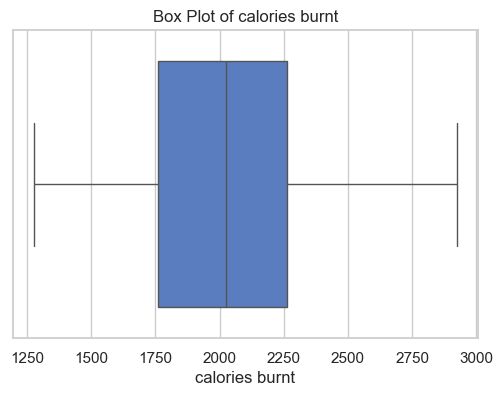

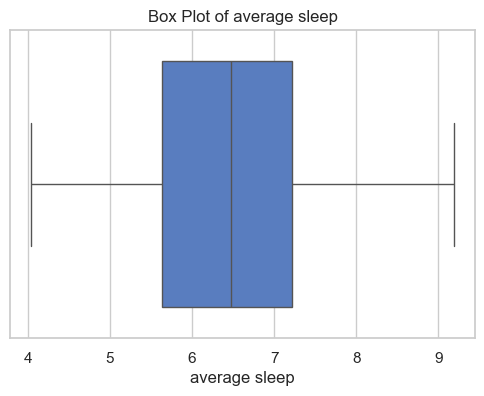

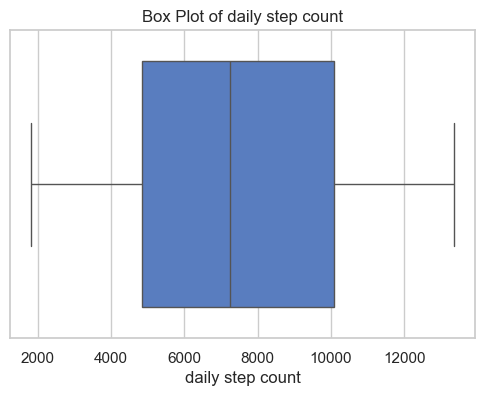

In [15]:
# Create box plots for each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()


### Bi-Variate Analysis ###
Scatter Plots (Relationships by Parkinson’s Status)
Scatter plots can help reveal relationships between any two variables. Color-code by the Parkinson’s status to see potential differences.

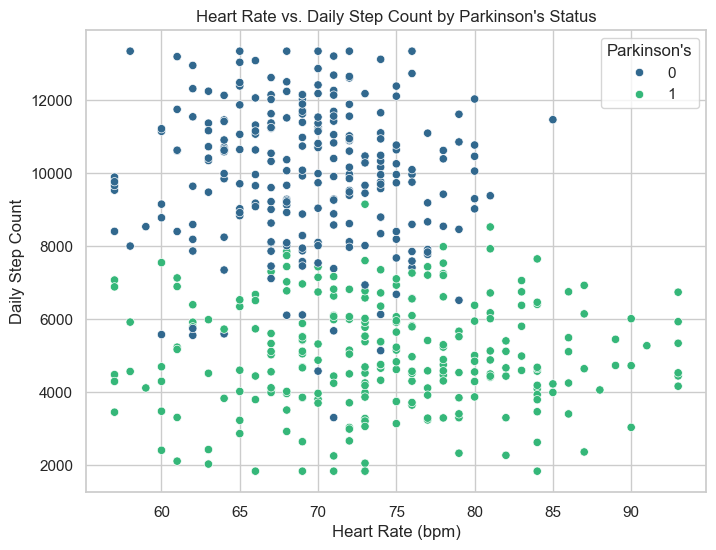

In [26]:
# Example: Plotting heart rate vs. daily step count, colored by Parkinson's status
plt.figure(figsize=(8, 6))
sns.scatterplot(x="heart rate", y="daily step count", hue="parkinsons", data=df, palette="viridis")
plt.title("Heart Rate vs. Daily Step Count by Parkinson's Status")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Daily Step Count")
plt.legend(title="Parkinson's")
plt.show()


Violin Plots (Distribution Split by Parkinson’s Status)
Violin plots provide the full distribution shape combined with summary statistics. Repeat for each feature relative to the target.

C:\Users\sures\AppData\Local\Temp\ipykernel_41152\4132233143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="parkinsons", y=col, data=df, palette="muted")


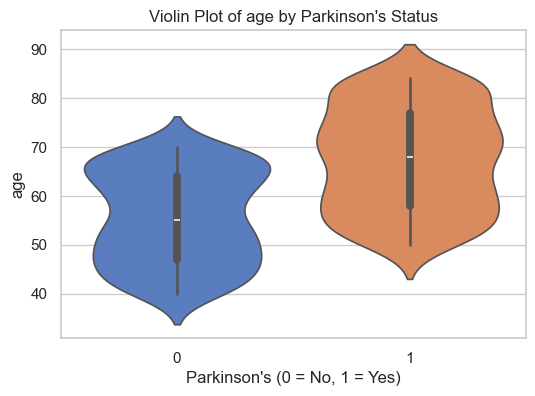

C:\Users\sures\AppData\Local\Temp\ipykernel_41152\4132233143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="parkinsons", y=col, data=df, palette="muted")


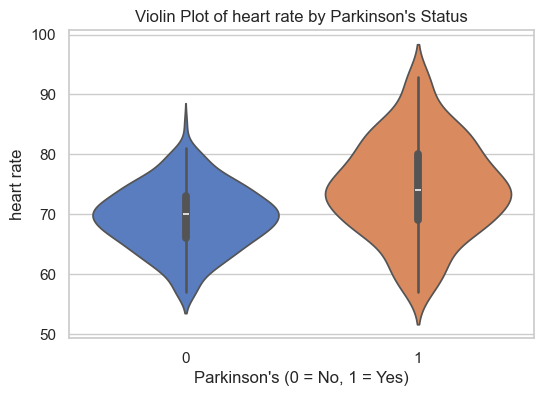

C:\Users\sures\AppData\Local\Temp\ipykernel_41152\4132233143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="parkinsons", y=col, data=df, palette="muted")


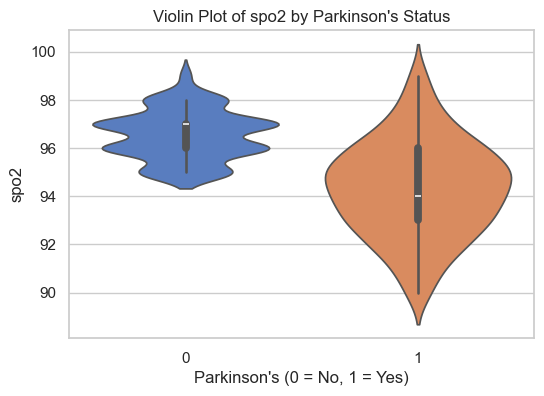

C:\Users\sures\AppData\Local\Temp\ipykernel_41152\4132233143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="parkinsons", y=col, data=df, palette="muted")


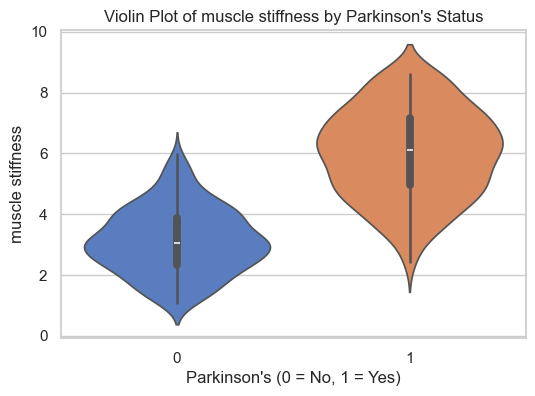

C:\Users\sures\AppData\Local\Temp\ipykernel_41152\4132233143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="parkinsons", y=col, data=df, palette="muted")


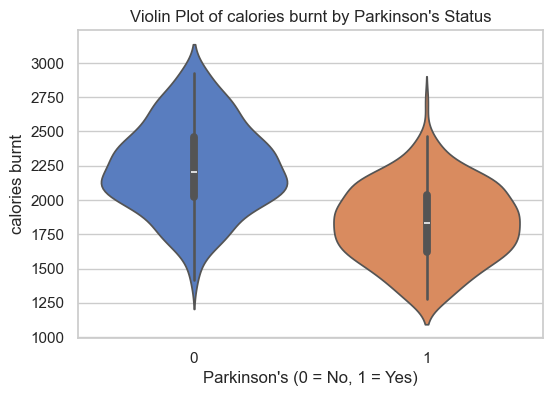

C:\Users\sures\AppData\Local\Temp\ipykernel_41152\4132233143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="parkinsons", y=col, data=df, palette="muted")


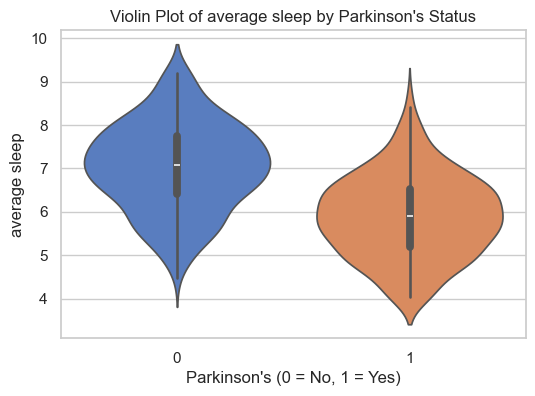

C:\Users\sures\AppData\Local\Temp\ipykernel_41152\4132233143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="parkinsons", y=col, data=df, palette="muted")


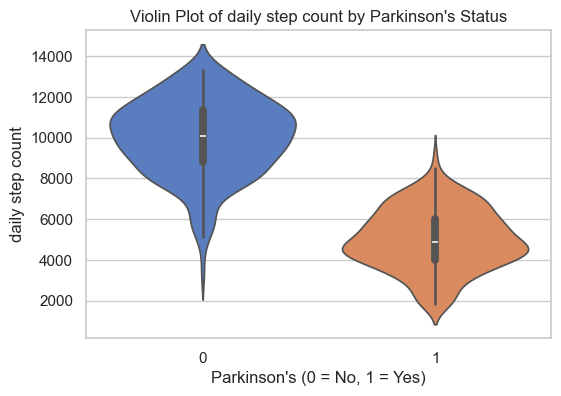

In [27]:
# Create a violin plot for each numeric feature split by Parkinson's status
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x="parkinsons", y=col, data=df, palette="muted")
    plt.title(f"Violin Plot of {col} by Parkinson's Status")
    plt.xlabel("Parkinson's (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()


### 4. Correlation Matrix ###
A correlation matrix heatmap identifies relationships among features, highlighting both strong and weak correlations.

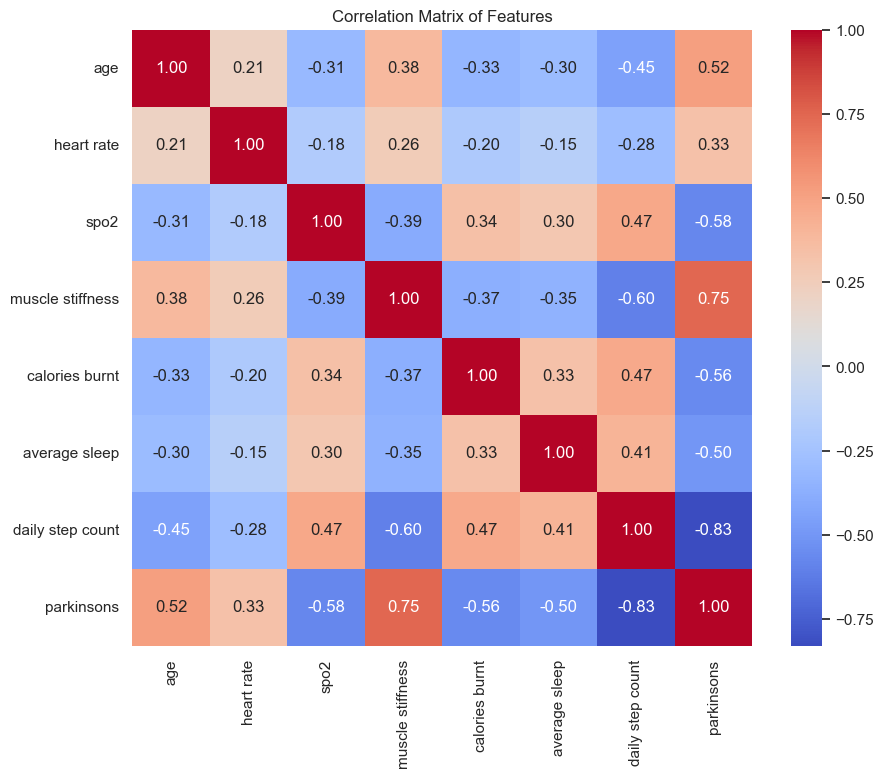

In [28]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()


### Splitting Data and Fitting the Model ###

In [29]:
# Prepare features and target variables
features = df.drop("parkinsons", axis=1)
target = df["parkinsons"]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Fit a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

C:\Users\sures\AppData\Local\Temp\ipykernel_41152\3952409347.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


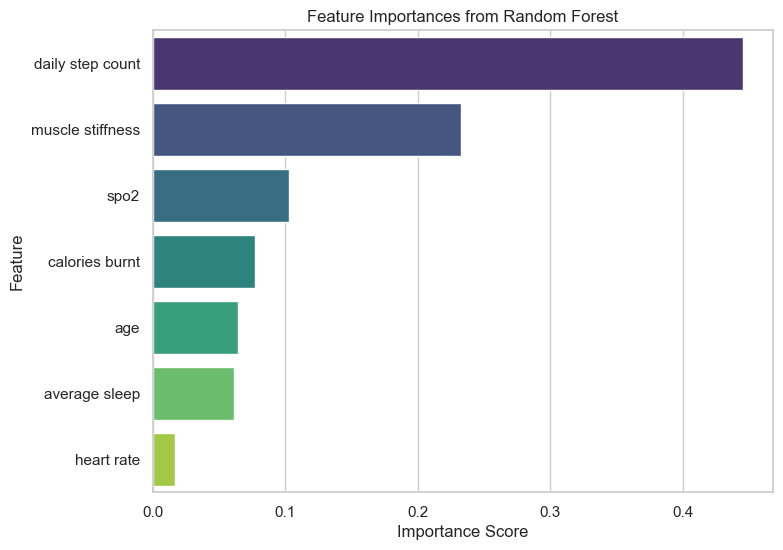

In [30]:
# Get feature importances from the model
importances = rf_model.feature_importances_
feature_names = features.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [31]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store model performance
results = {}

# Loop through models, train, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute accuracy and ROC-AUC
    accuracy = accuracy_score(y_test, y_pred)
    # Some models (like LogisticRegression) support predict_proba; for those that don't, consider decision_function
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    results[name] = {"Accuracy": accuracy, "ROC-AUC": roc_auc}
    
    # Display performance metrics
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(accuracy))
    print("ROC-AUC: {:.2f}".format(roc_auc))
    print(classification_report(y_test, y_pred))
    print("-"*50)


--- Logistic Regression ---
Accuracy: 0.98
ROC-AUC: 1.00
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

--------------------------------------------------
--- Random Forest ---
Accuracy: 0.97
ROC-AUC: 1.00
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.98      0.96      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

--------------------------------------------------
--- Gradient Boosting ---
Accuracy: 0.98
ROC-AUC: 1.00
              precision    recall  f1-score   support

           0       0.98   

In [32]:
# Determine the best model based on accuracy
best_model_name = max(results, key=lambda key: results[key]["Accuracy"])
print("The best performing model is:", best_model_name)
print("Metrics for the best model:", results[best_model_name])


The best performing model is: Logistic Regression
Metrics for the best model: {'Accuracy': 0.98, 'ROC-AUC': 0.9992}
